# Setup


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
from networkx.generators.random_graphs import (
    connected_watts_strogatz_graph, erdos_renyi_graph
)

In [2]:
from sir_model import ProximityModel, NetworkModel, indicator
from test_model import generate_scatterplot , compute_averages
from inference_model import MeanField, DynamicMessagePassing

# Erdos Renyi - uniform random states

## Model

Name: 
Type: Graph
Number of nodes: 400
Number of edges: 1561
Average degree:   7.8050
expected number of contacts 3.9
Generating transmissions
Running simulation
t = 0 / 100


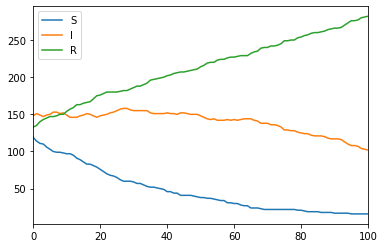

In [3]:
N = 400
proba_contact = 0.5
graph = erdos_renyi_graph(n=N, p=0.02)
layout = nx.random_layout(graph)
print(nx.info(graph))

# 1/3 S, 1/3 I, 1/3 R 
initial_states = np.random.randint(3, size=N)
model =  NetworkModel(
    graph=graph, mu=0.01, lamb=0.02, proba_contact=proba_contact, 
    layout=layout, initial_states=initial_states
)
print("expected number of contacts %.1f" % model.n_contacts)
model.run(100, print_every=200)
model.get_counts().plot();

## Check inference

In [5]:
times=[20,60]
n_run=500
n_times=len(times)
t_max = max(times)+1

avg_states = compute_averages(model=model, n_run=n_run, times=times)

n = 0 / 500
n = 100 / 500
n = 200 / 500
n = 300 / 500
n = 400 / 500


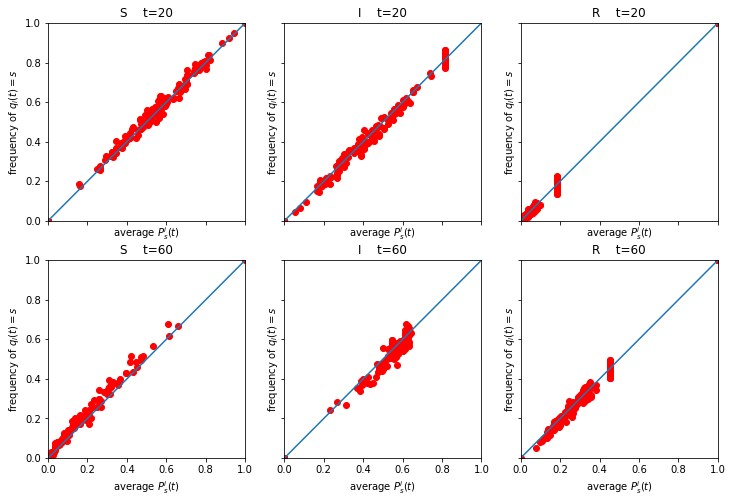

In [7]:
initial_probas = indicator(model.initial_states)

infer = MeanField(initial_probas, model.x_pos, model.y_pos)
infer.initial_probas = indicator(model.initial_states)
infer.time_evolution(model.recover_probas, model.transmissions[:t_max+1], print_every=0)
probas = infer.probas[times]

generate_scatterplot(avg_states=avg_states, probas=probas, times=times)

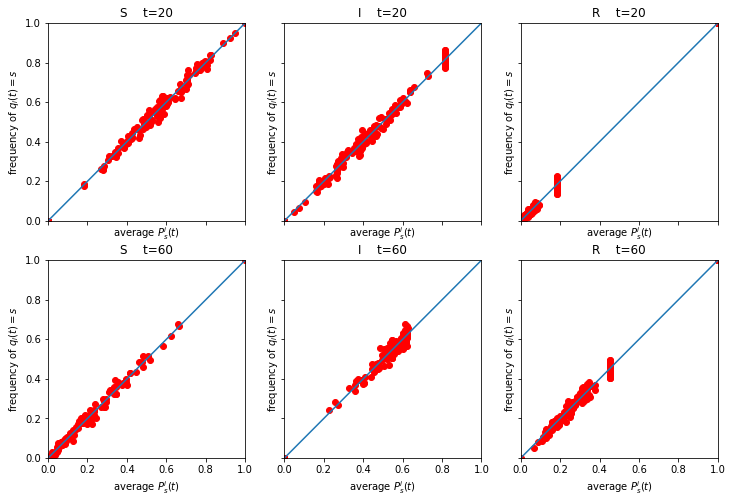

In [8]:
initial_probas = indicator(model.initial_states)

infer = DynamicMessagePassing(initial_probas, model.x_pos, model.y_pos)
infer.initial_probas = indicator(model.initial_states)
infer.time_evolution(model.recover_probas, model.transmissions[:t_max+1], print_every=0)
probas = infer.probas[times]

generate_scatterplot(avg_states=avg_states, probas=probas, times=times)

# Proximity model - few patient zeros

## Model

In [9]:
def patient_zeros_states(N, N_patient_zero):
    states = np.zeros(N)
    patient_zero = np.random.choice(N, N_patient_zero, replace=False)
    states[patient_zero] = 1
    return states

expected number of contacts 5.6
Generating transmissions
Running simulation
t = 0 / 100


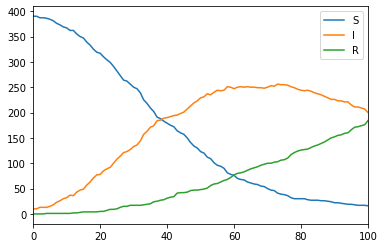

In [10]:
N = 400
N_patient_zero = 10
np.random.seed(39)
initial_states = patient_zeros_states(N, N_patient_zero)
model =  ProximityModel(
    N=N, mu=0.01, lamb=0.02, scale=1.0,
    initial_states=initial_states
)

print("expected number of contacts %.1f" % model.n_contacts)
model.run(100, print_every=200)
model.get_counts().plot();

## Check inference

In [11]:
times=[20,60]
n_run=500
n_times=len(times)
t_max = max(times)+1

avg_states = compute_averages(model=model, n_run=n_run, times=times)

n = 0 / 500
n = 100 / 500
n = 200 / 500
n = 300 / 500
n = 400 / 500


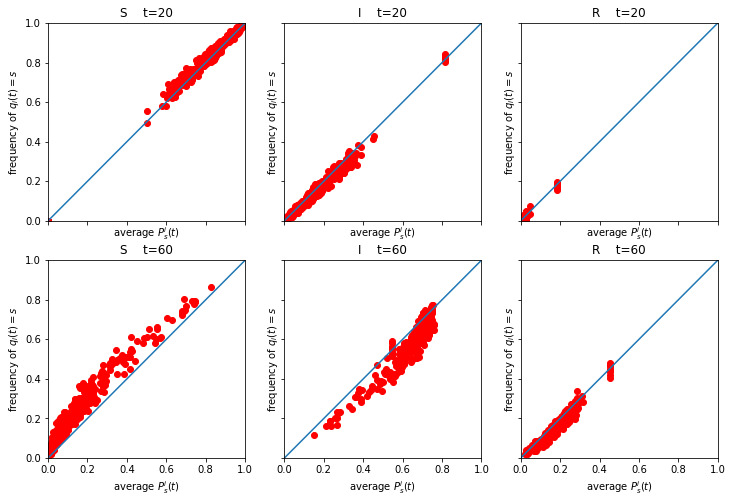

In [12]:
initial_probas = indicator(model.initial_states)

infer = MeanField(initial_probas, model.x_pos, model.y_pos)
infer.initial_probas = indicator(model.initial_states)
infer.time_evolution(model.recover_probas, model.transmissions[:t_max+1], print_every=0)
probas = infer.probas[times]

generate_scatterplot(avg_states=avg_states, probas=probas, times=times)

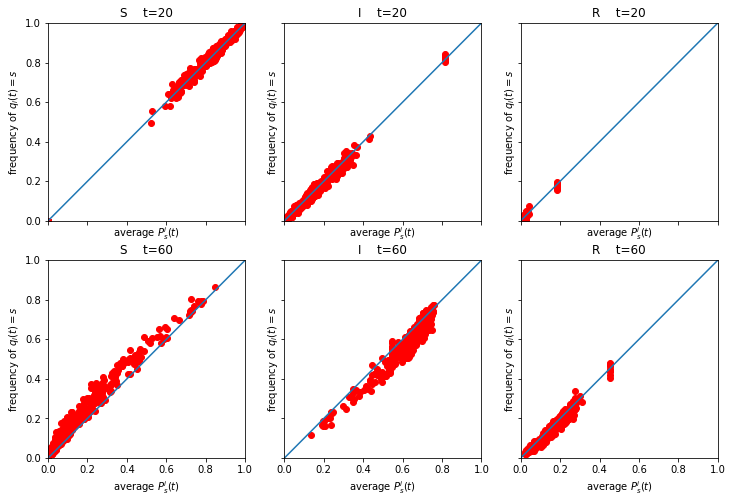

In [13]:
initial_probas = indicator(model.initial_states)

infer = DynamicMessagePassing(initial_probas, model.x_pos, model.y_pos)
infer.initial_probas = indicator(model.initial_states)
infer.time_evolution(model.recover_probas, model.transmissions[:t_max+1], print_every=0)
probas = infer.probas[times]

generate_scatterplot(avg_states=avg_states, probas=probas, times=times)